In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]

In [2]:
confirmed_cases = pd.read_csv('confirmed_cases.csv')
deaths = pd.read_csv('deaths.csv')
recoveries = pd.read_csv('recoveries.csv')

In [3]:
confirmed_cases.drop(columns = ['Province/State', 'Lat', 'Long'], inplace = True)
deaths.drop(columns = ['Province/State', 'Lat', 'Long'], inplace = True)
recoveries.drop(columns = ['Province/State', 'Lat', 'Long'], inplace = True)

In [4]:
def getSumOfDf(country, df, min_date):
    x = df[df['Country/Region'] == country].sum()

    for date, _ in x.iteritems():
        if date == min_date:
            break
        x.drop(date, inplace = True)

    return x

In [5]:
china_cases, iran_cases, sk_cases, italy_cases = [getSumOfDf(c[0], confirmed_cases, c[1]) for c in [('China', '1/22/20'), ('Iran', '2/20/20'), ('Korea, South', '2/18/20'), ('Italy', '2/19/20')]]
china_deaths, iran_deaths, sk_deaths, italy_deaths = [getSumOfDf(c[0], deaths, c[1]) for c in [('China', '1/22/20'), ('Iran', '2/20/20'), ('Korea, South', '2/18/20'), ('Italy', '2/19/20')]]
china_recoveries, iran_recoveries, sk_recoveries, italy_recoveries = [getSumOfDf(c[0], recoveries, c[1]) for c in [('China', '1/22/20'), ('Iran', '2/20/20'), ('Korea, South', '2/18/20'), ('Italy', '2/19/20')]]

In [6]:
world_cases = confirmed_cases.sum().drop('Country/Region')
world_deaths = deaths.sum().drop('Country/Region')
world_recoveries = recoveries.sum().drop('Country/Region')

In [7]:
def plotForCountry(country, cases, deaths, recoveries):
    plt.plot(cases, label = 'Total confirmed cases')
    plt.plot(deaths, label = 'Total deaths')
    plt.plot(recoveries, label = 'Total recoveries')
    plt.plot(cases - recoveries - deaths, label = 'Total active cases')
    plt.title(f'CoVID-19 in {country}')
    plt.legend()
    ticks = plt.xticks(rotation = 85)
    step = round(cases.max() / 1500) * 100
    ticks = plt.yticks(np.arange(0, cases.max() + step + 50, step))
    plt.rcParams.update({'font.size': 22})
    plt.tight_layout()
    plt.grid()
    plt.savefig(f'{country}.png')

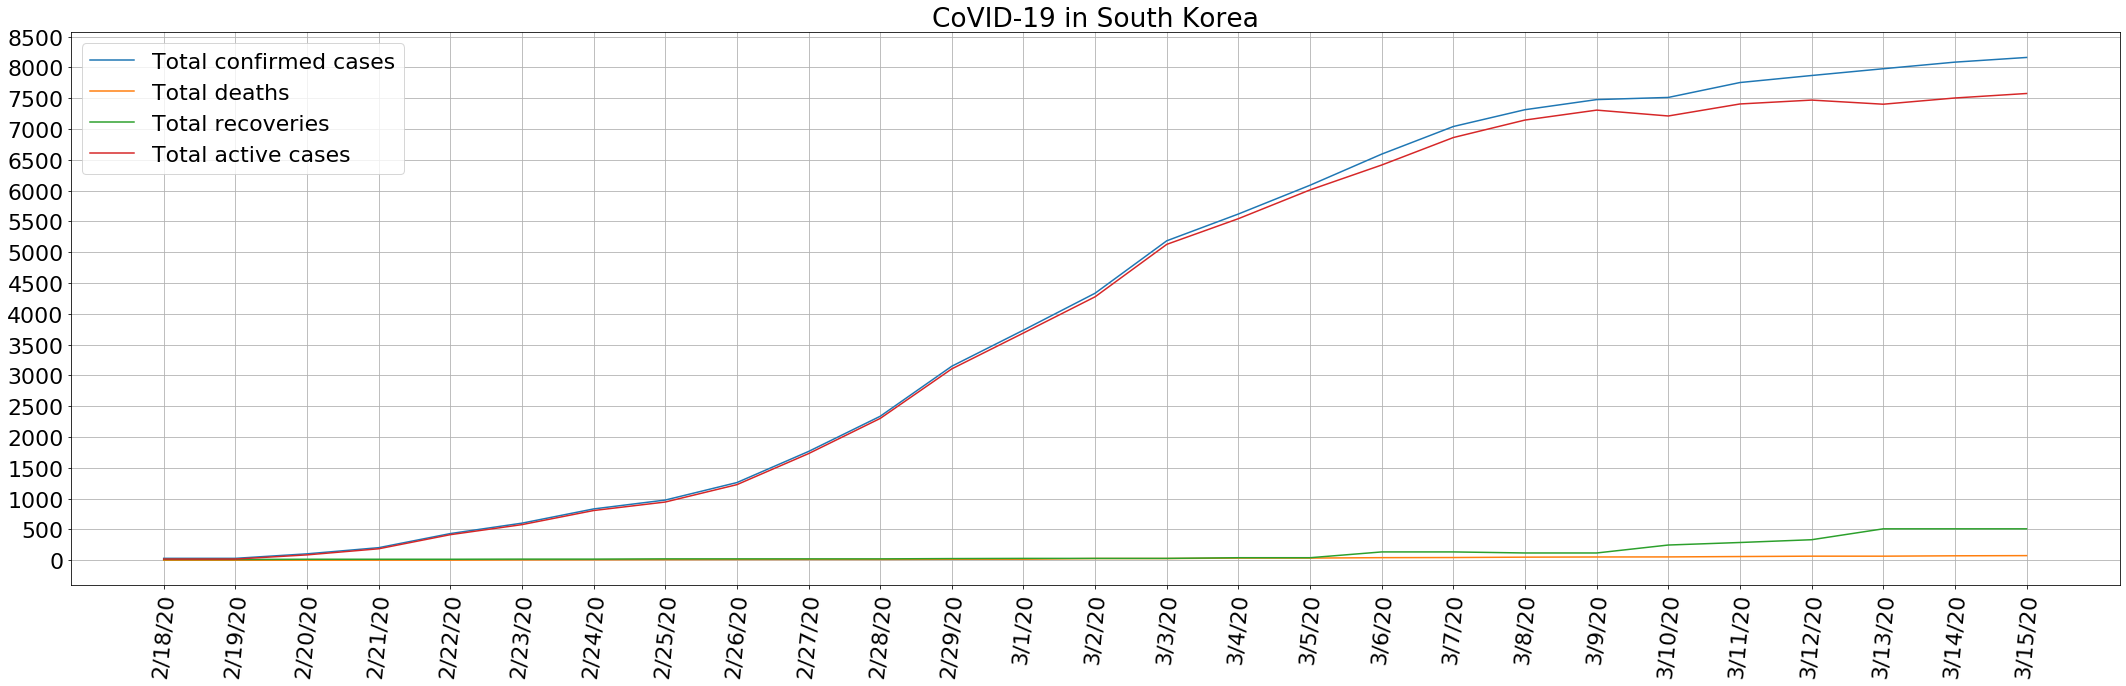

In [18]:
plotForCountry('South Korea', sk_cases, sk_deaths, sk_recoveries)

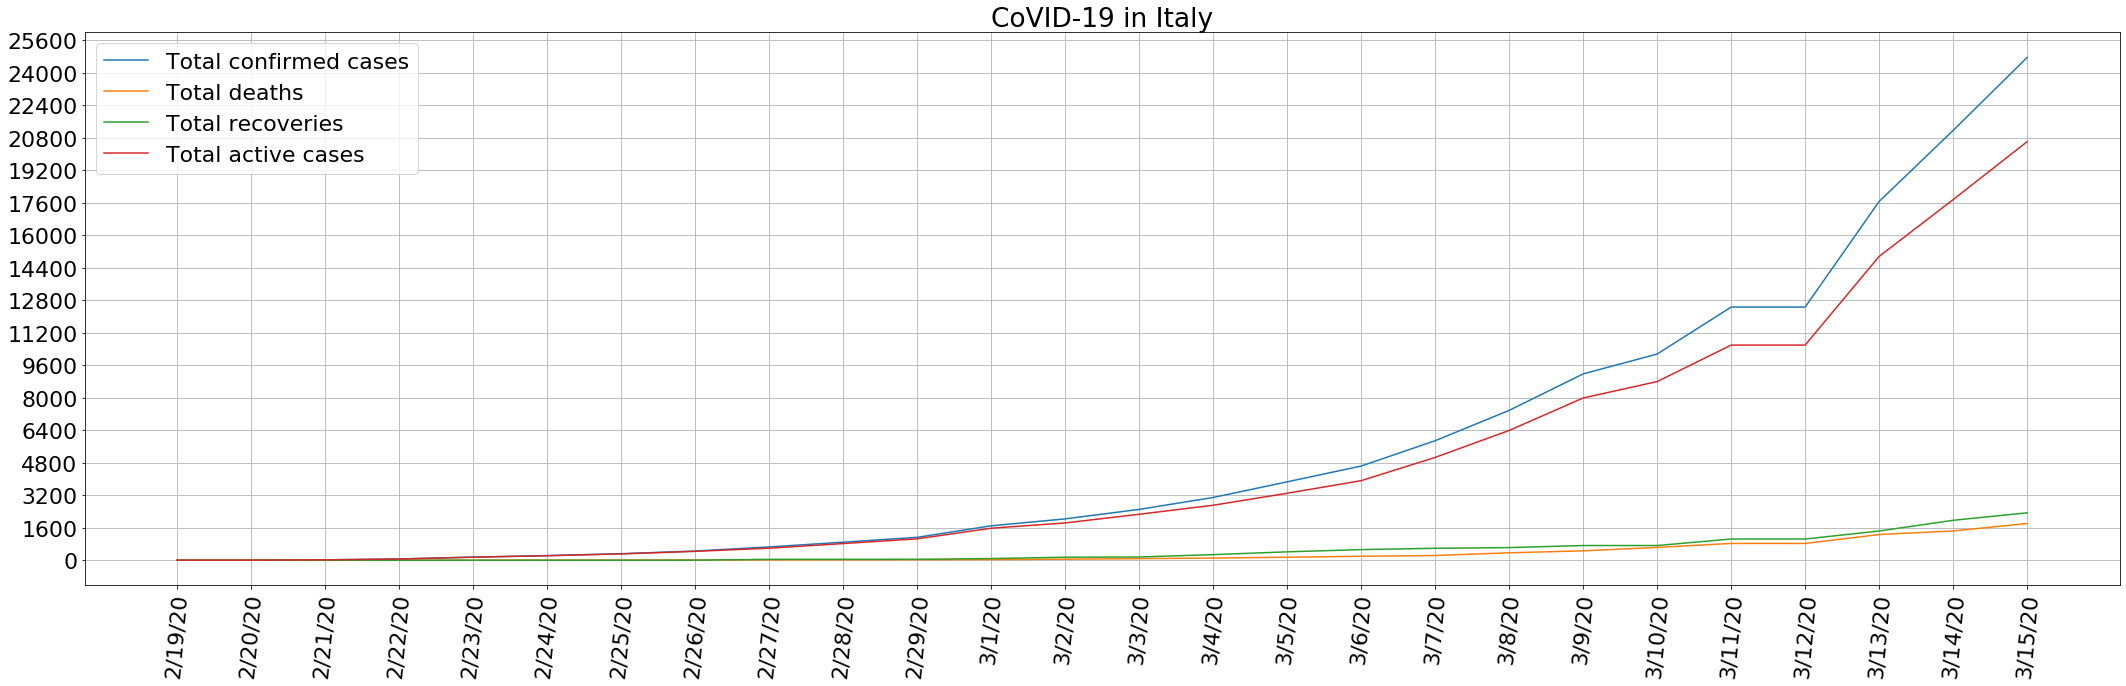

In [19]:
plotForCountry('Italy', italy_cases, italy_deaths, italy_recoveries)

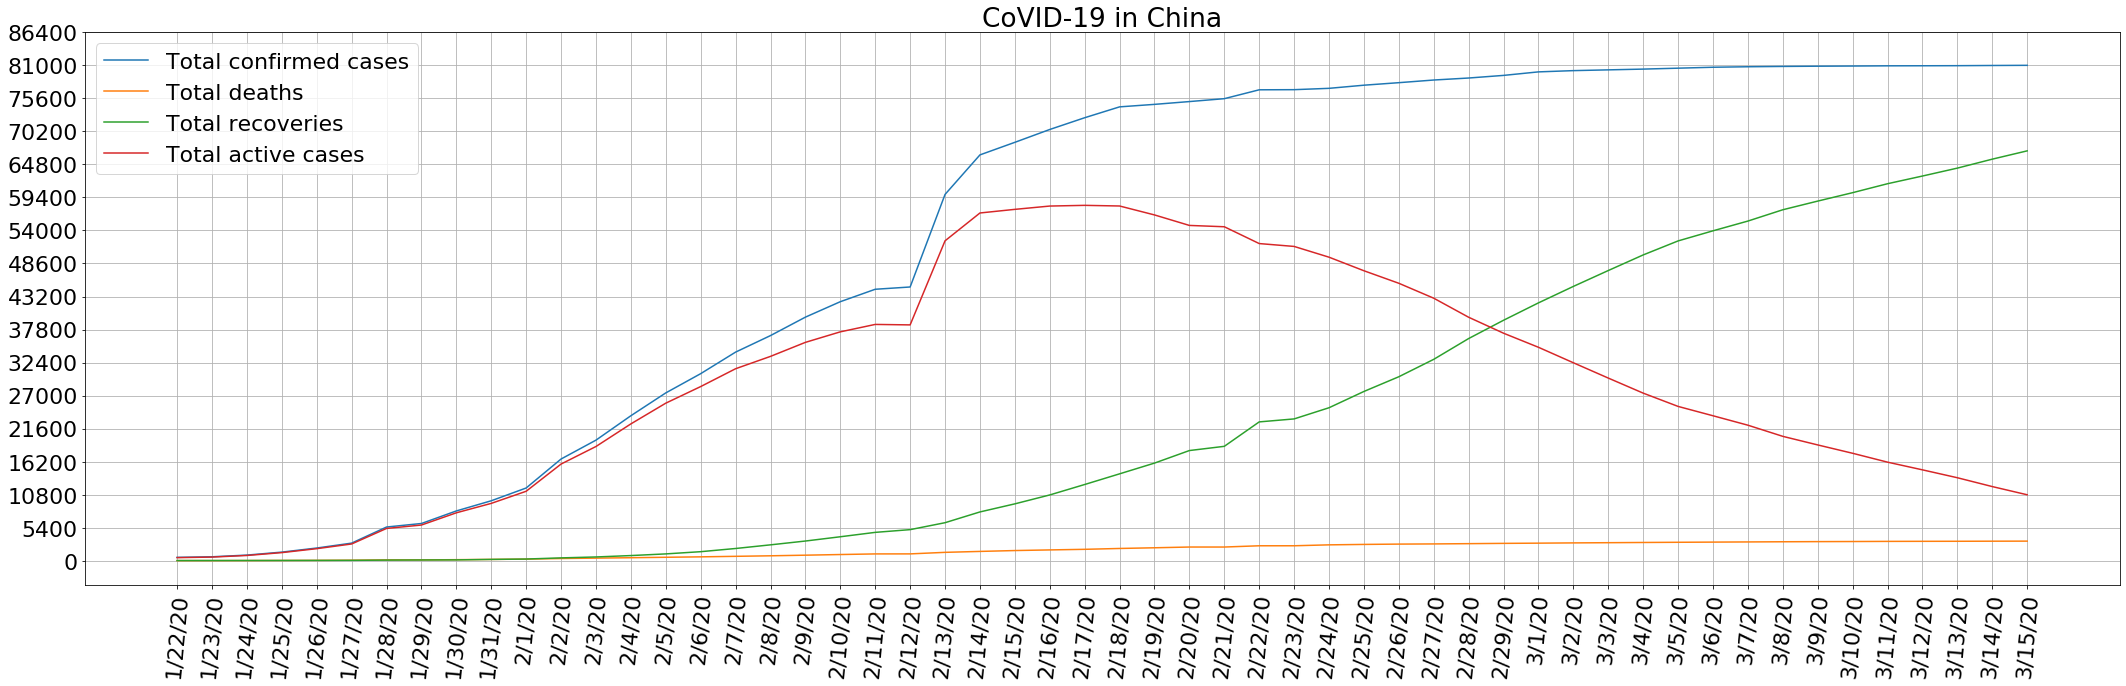

In [20]:
plotForCountry('China', china_cases, china_deaths, china_recoveries)

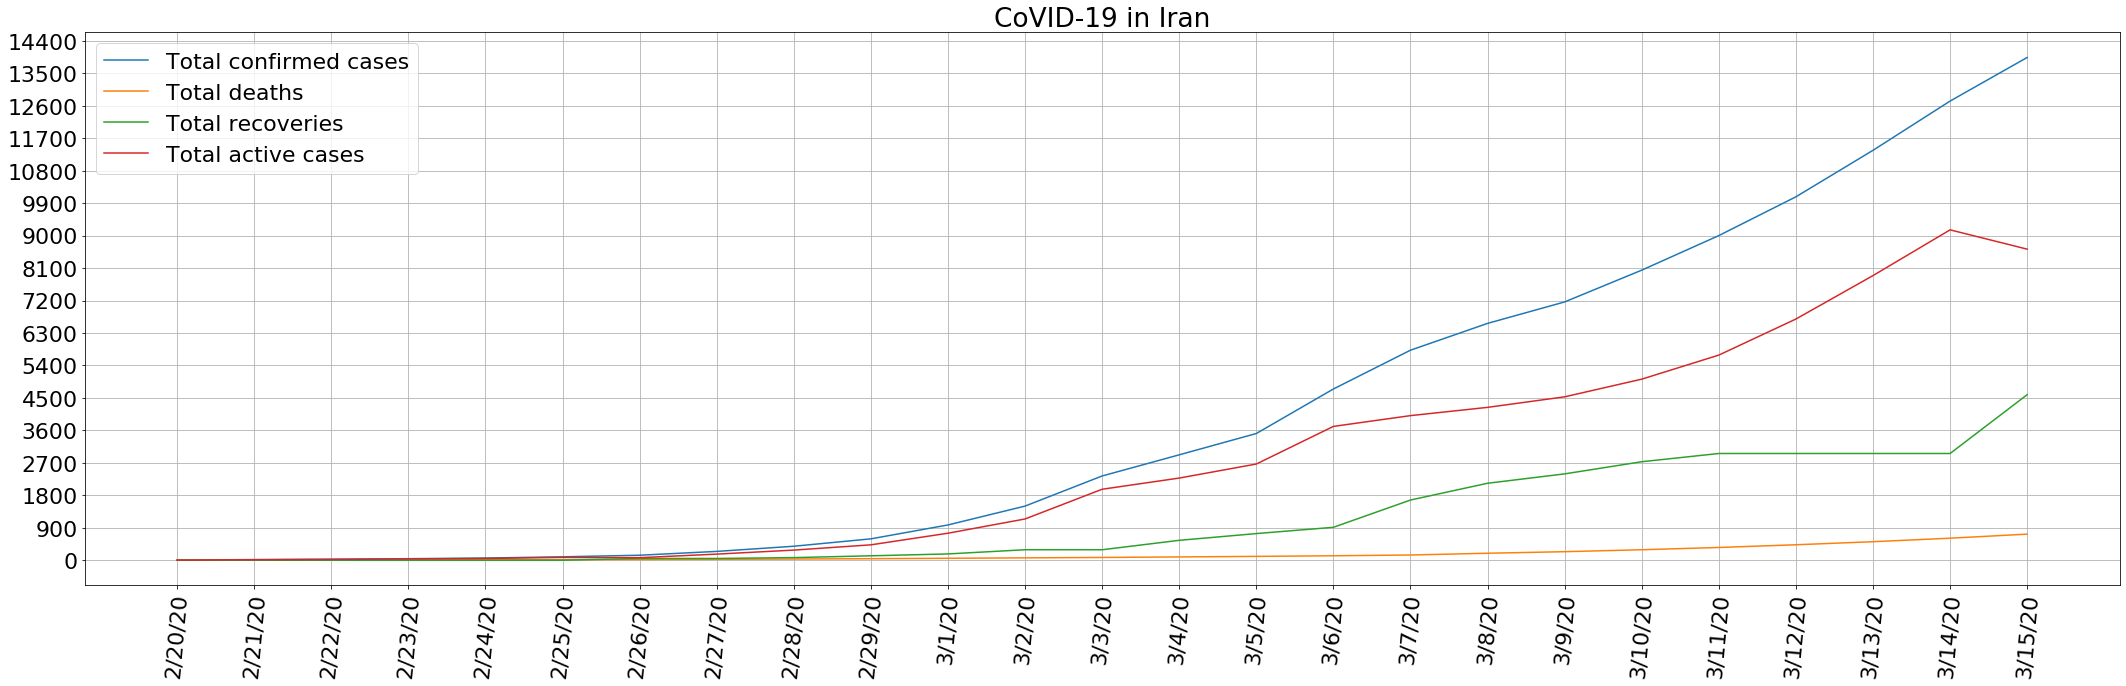

In [21]:
plotForCountry('Iran', iran_cases, iran_deaths, iran_recoveries)

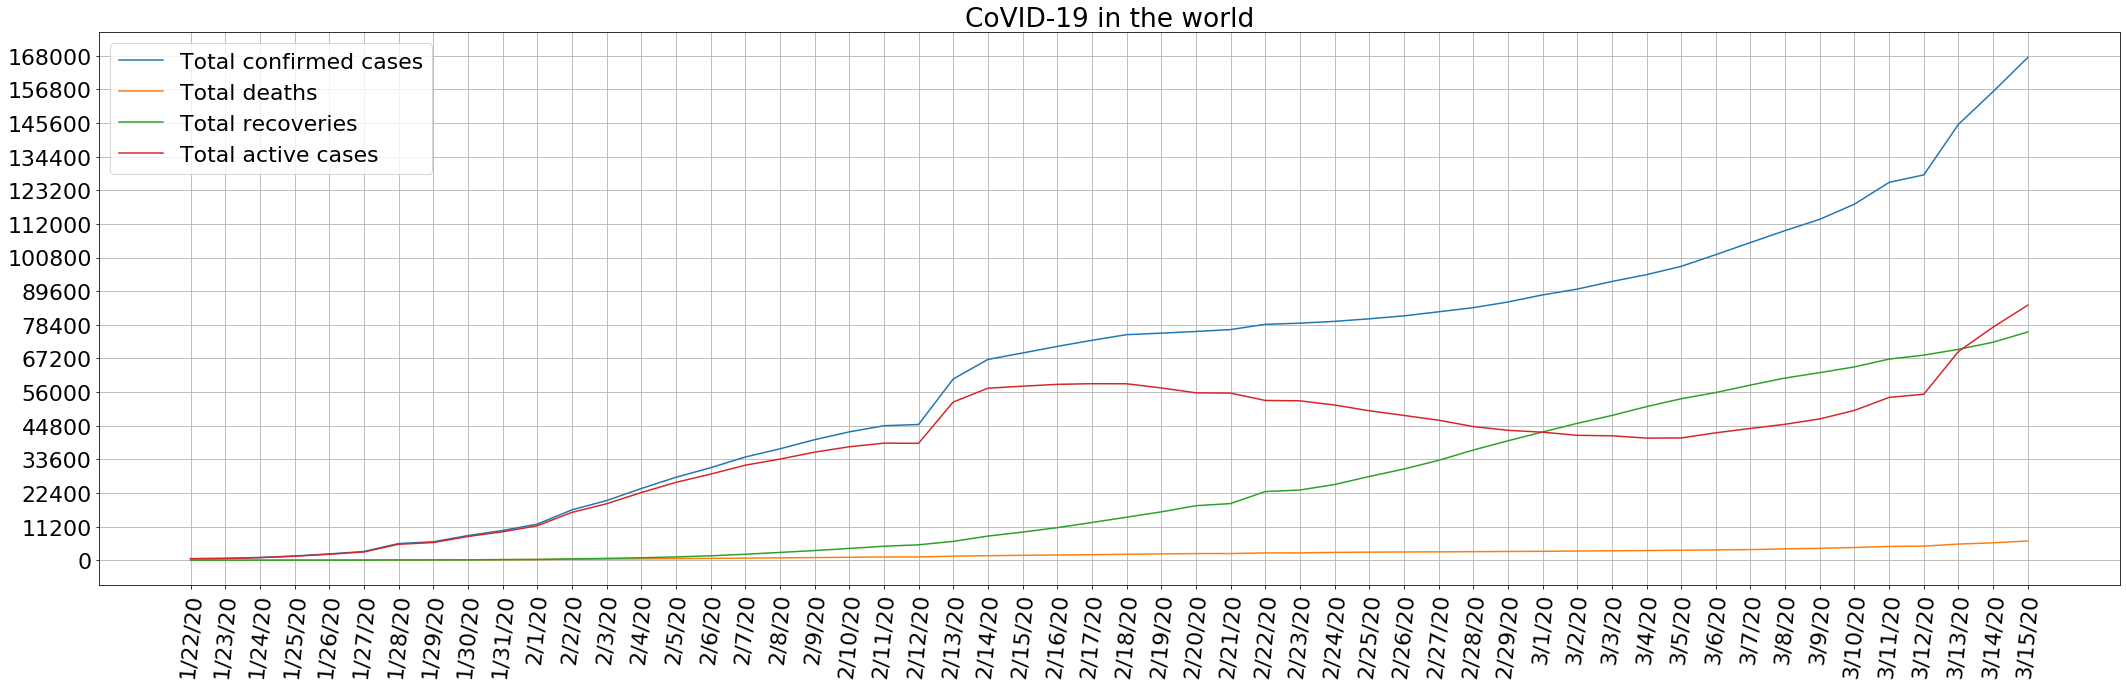

In [22]:
plotForCountry('the world', world_cases, world_deaths, world_recoveries)